# CLustering Techniques #

Dataset: Student_Info.csv

https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset

This dataset contains anonymized student-level data capturing key academic, demographic, and behavioral features. It's crafted to help users understand the impact of various factors—such as study time, family background, and extracurricular activities—on student performance outcomes.

Objective
* Explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.
* Implement various clustering methods to reveal patterns on student performance. Optimize clustering parameters and analyze the clusters.

### Assignment 1: Data Preprocessing & Exploratory Data Analysis (30 points) ###
* Import and initially explore the dataset.
* Clean the data by handling missing values and duplicates.
* Standardize data types for analysis.
* Perform EDA to understand the features of the dataset.
* Identify and visualize relationships between features.


Missing values per column:
student_id          0
name                0
gender              0
age                 0
grade_level         0
math_score          0
reading_score       0
writing_score       0
attendance_rate     0
parent_education    0
study_hours         0
internet_access     0
lunch_type          0
extra_activities    0
final_result        0
dtype: int64
Before standardization:  student_id           object
name                 object
gender               object
age                   int64
grade_level           int64
math_score            int64
reading_score         int64
writing_score         int64
attendance_rate     float64
parent_education     object
study_hours         float64
internet_access      object
lunch_type           object
extra_activities     object
final_result         object
dtype: object
After standardization:  gender              category
age                    int64
grade_level         category
math_score             int64
reading_score          int64
w

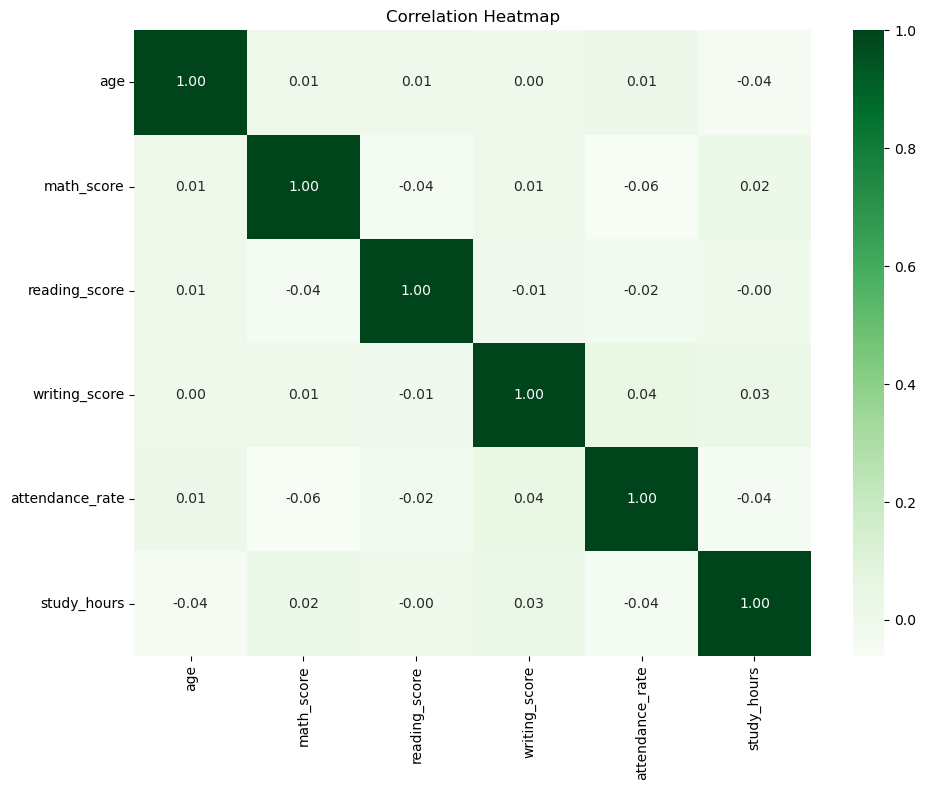

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assignment 1
# Import and initially explore the dataset
df = pd.read_csv("student_info.csv")

# Clean the data by handling missing values and duplicates
print("\nMissing values per column:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

# Standardize data types for analysis
print("Before standardization: ", df.dtypes)
df.drop(columns=["name", "student_id"], inplace=True)

categorical_cols = [
    "gender",
    "grade_level",
    "parent_education",
    "internet_access",
    "lunch_type",
    "extra_activities",
    "final_result",
]
for col in categorical_cols:
    df[col] = df[col].astype("category")

df["math_score"] = pd.to_numeric(df["math_score"], errors="coerce")
df["reading_score"] = pd.to_numeric(df["reading_score"], errors="coerce")
df["writing_score"] = pd.to_numeric(df["writing_score"], errors="coerce")
df["study_hours"] = pd.to_numeric(df["study_hours"], errors="coerce")
df["attendance_rate"] = pd.to_numeric(df["attendance_rate"], errors="coerce")

print("After standardization: ", df.dtypes)

# Perform EDA to understand the features of the dataset
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.describe(include="all"))

# Identify and visualize relationships between features
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Assignment  2: Feature Selection and Data Preparation (20 points) ###
* Select relevant features for clustering
* Standard scale the data as appropriate

In [18]:
# Assignment 2
# Select relevant features for clustering
selected_columns = [
    "math_score",
    "reading_score",
    "writing_score",
]

# Extract the features
X = df[selected_columns]

# Standard scale the data as appropriate
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Assignment 3: *K*-Means Clustering (50 points) ###
* Using Elbow method to determine the optional number of clusters. Plot the WCSS with *k* and determine the elbow point (*k*). 
* Use Silouette score to determine the optimal number of clusters. Plot the Silouette score with *k* and determine the optional *k*.
* Implement the K-Means algorithm and visualize the resulting clusters for each optional *k* in above questions.

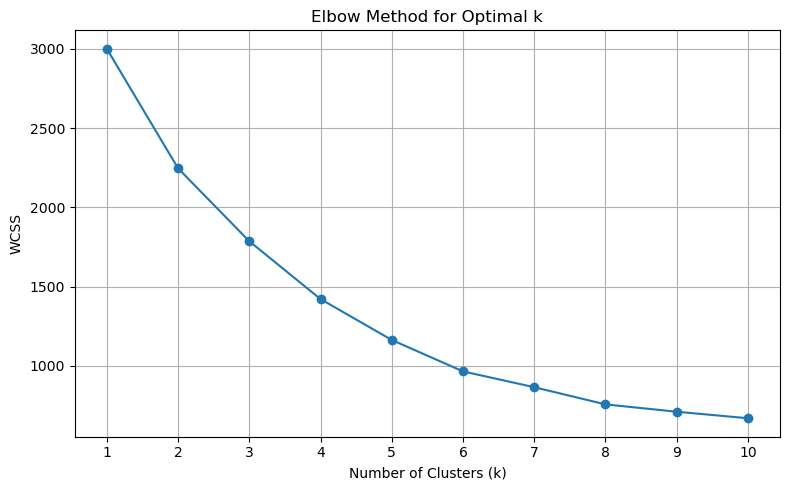

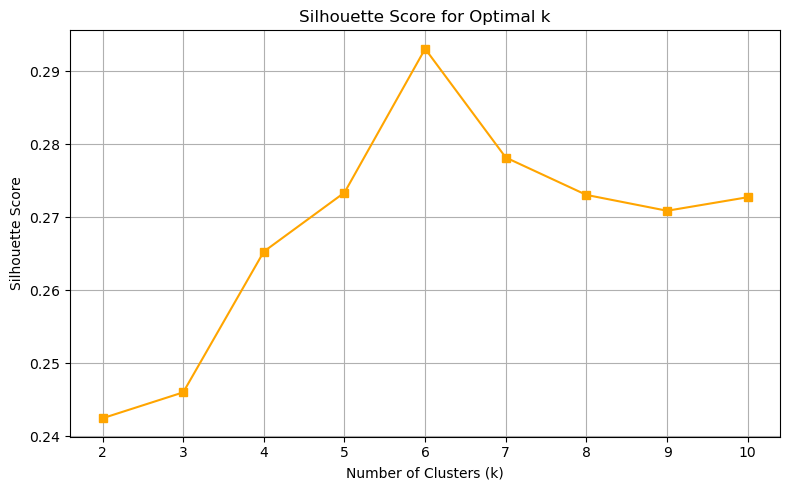

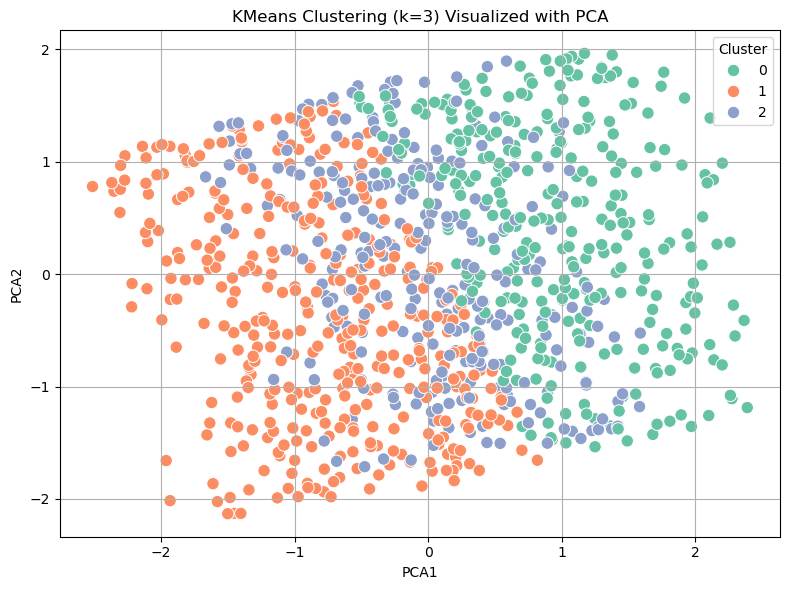

In [19]:
# Assignment 3
# Using Elbow method to determine the optional number of clusters. Plot the WCSS with *k* and determine the elbow point (*k*)
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs K
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Use Silouette score to determine the optimal number of clusters. Plot the Silouette score with *k* and determine the optional *k*
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    sil_scores.append(score)

# Plot Silhouette score vs K
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker="s", color="orange")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()

# Implement the K-Means algorithm and visualize the resulting clusters for each optional *k* in above questions
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = cluster_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title(f"KMeans Clustering (k={k_optimal}) Visualized with PCA")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()